In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
np.random.seed(0)

## Data loading

In [2]:
cycleB = pd.read_csv("Data/Chickens data/CycleB-Data301022.csv", sep=";")
meteorological_data = pd.read_csv("Data/Meteorological data/RW_20221107172813_515881_5121_1.csv", sep=",")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Meteorological data/RW_20221107172813_515881_5121_1.csv'

## Data cleaning

In [ ]:
# removing rows with Nan values from chickens data
cycleB = cycleB.dropna()

# removing rows with non valid data from meteorological data
meteorological_data = meteorological_data[meteorological_data["Average_daily_value"] != -999.0]

# removing "%" value from chickens data
cycleB["% laied"] = cycleB["% laied"].str.rstrip("%").astype(float)

# modifying data format of chickens data for uniformity: YYYY/MM/DD
cycleB['Arrival Chickens Date'] = pd.to_datetime(cycleB["Arrival Chickens Date"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Laid'] = pd.to_datetime(cycleB["Date of Laid"], dayfirst=True).dt.strftime('%Y/%m/%d')
cycleB['Date of Selling'] = pd.to_datetime(cycleB["Date of Selling"], dayfirst=True).dt.strftime('%Y/%m/%d')


## Data preview

## Data join: chicken's data with meteorological data

In [ ]:
weather_join_chickens_b = pd.merge(cycleB, meteorological_data, left_on='Date of Laid', right_on='Date', how='inner')

## Data normalization

In [ ]:
# apply min-max normalization techniques

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#for column in weather_join_chickens_b:
#    if(column!="Arrival Chickens Date" and column!="Date of Laid" and column!="Date of Selling" and column!="Date"):
#        weather_join_chickens_b[column] = scaler.fit_transform(weather_join_chickens_b[column].values.reshape(-1, 1))

In [ ]:
weather_join_chickens_b = weather_join_chickens_b.where(weather_join_chickens_b["Feed Consumption (gr)"]<150)
weather_join_chickens_b = weather_join_chickens_b.where(weather_join_chickens_b["# of Eggs"]>10000) 
weather_join_chickens_b = weather_join_chickens_b.where(weather_join_chickens_b["# of Eggs"]<45000) 

## Data inspection

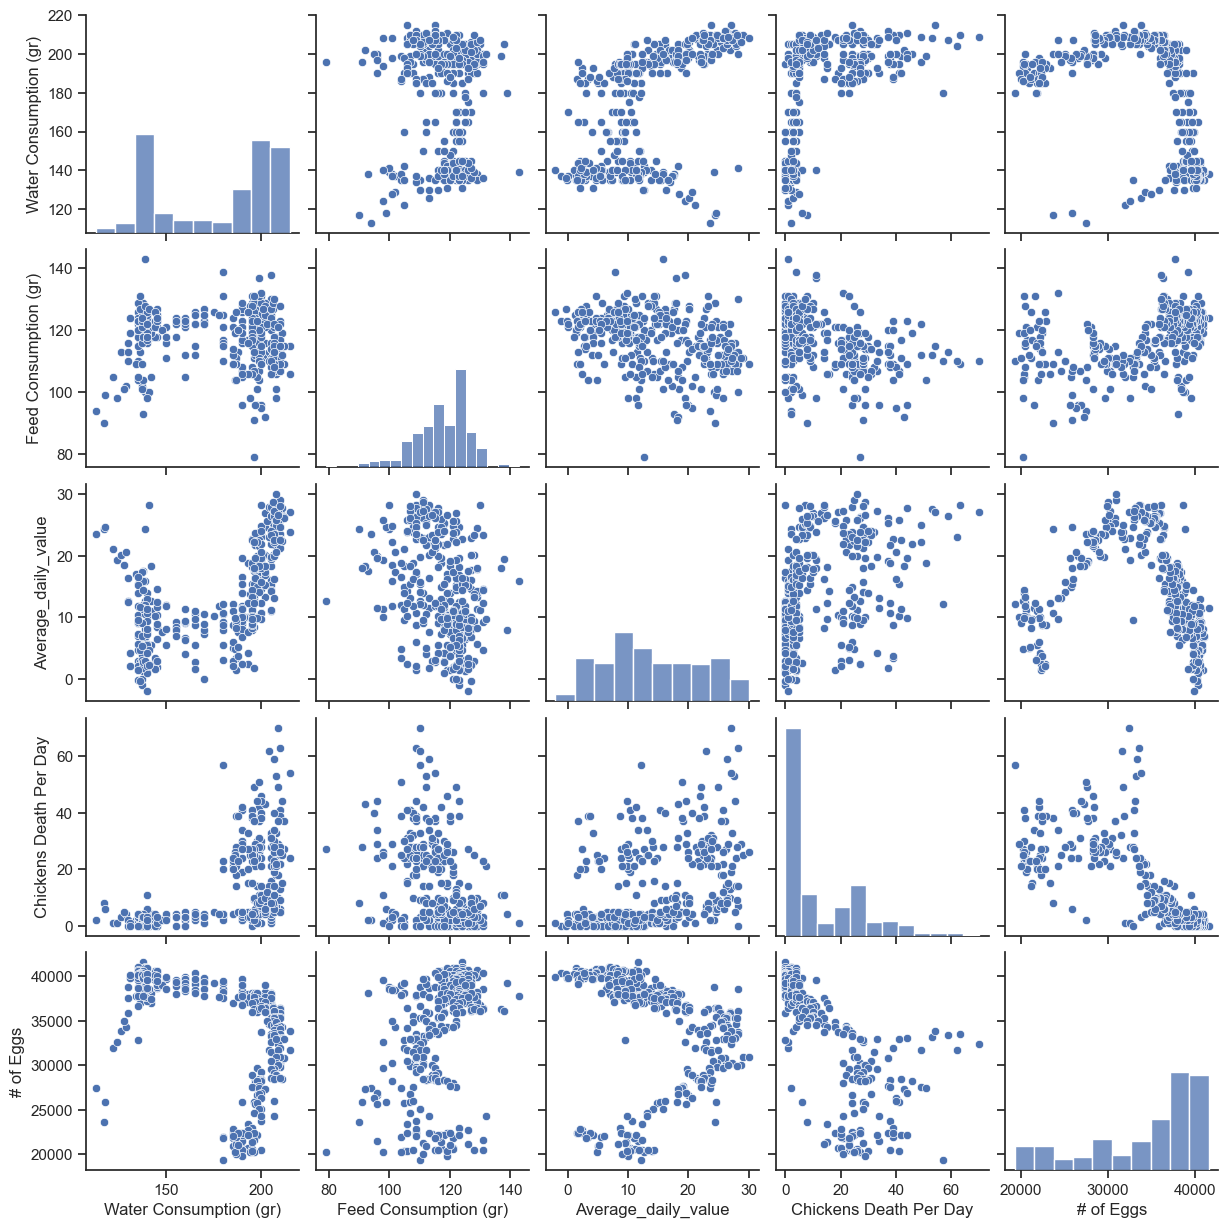

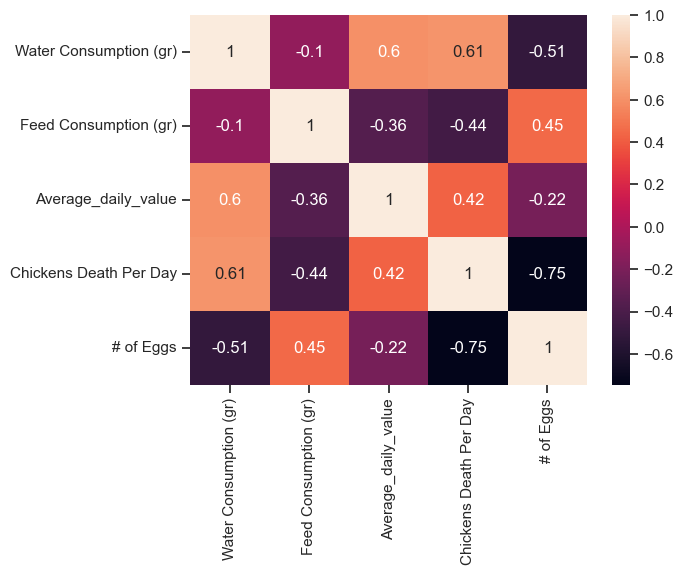

In [ ]:
# input (x) and output (y) features
x_features = ["Water Consumption (gr)", "Feed Consumption (gr)", "Average_daily_value"]
y_features = ["Chickens Death Per Day", "# of Eggs"]

# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(weather_join_chickens_b[x_features + y_features])
plt.show()

# heatmap cycle B
sns.heatmap(weather_join_chickens_b[x_features + y_features].corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='Average_daily_value', ylabel='Water Consumption (gr)'>

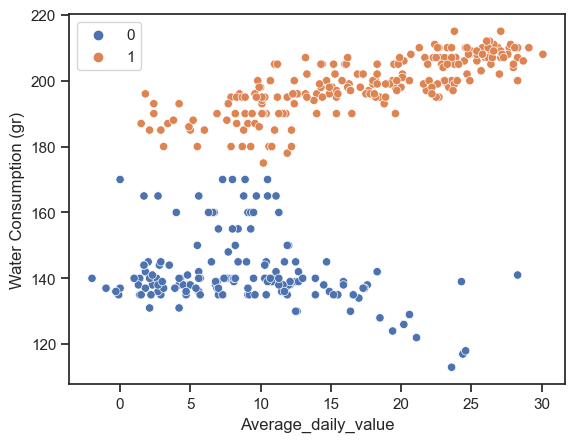

In [ ]:
from sklearn.cluster import KMeans

toCluster = ["Average_daily_value", "Water Consumption (gr)"]

ax=plt.subplot()

# Fit Kmeans for each dataset
model = KMeans(n_clusters=2)   # 2- hyperparams
model.fit(weather_join_chickens_b[toCluster])                   # 3- model fitting (unsupervised, y is not required)
y_predict = model.predict(weather_join_chickens_b[toCluster])   # 4- model testing

# And show the resulting clusters
sns.scatterplot(x=weather_join_chickens_b[toCluster].iloc[:, 0], y=weather_join_chickens_b[toCluster].iloc[:, 1], hue=y_predict, ax=ax)

In [ ]:
data_tranformation = weather_join_chickens_b.copy()

In [ ]:
b_sqrt = weather_join_chickens_b.copy()
b_sqrt["# of Eggs"] = np.sqrt(b_sqrt["# of Eggs"])
b_sqrt["Water Consumption (gr)"] = np.sqrt(b_sqrt["Water Consumption (gr)"])
# input (x) and output (y) features
x_features = ["Water Consumption (gr)", "Feed Consumption (gr)", "Average_daily_value"]
y_features = ["Chickens Death Per Day", "# of Eggs"]

# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(b_sqrt[x_features + y_features])
plt.show()

# heatmap cycle B
sns.heatmap(b_sqrt[x_features + y_features].corr(), annot=True)
plt.show()

In [ ]:
b_log = weather_join_chickens_b.copy()
b_log["# of Eggs"] = np.log(b_log["# of Eggs"])
# input (x) and output (y) features
x_features = ["Water Consumption (gr)", "Feed Consumption (gr)", "Average_daily_value"]
y_features = ["Chickens Death Per Day", "# of Eggs"]

# pair plot cycle B
sns.set(style="ticks", color_codes=True)
sns.pairplot(b_log[x_features + y_features])
plt.show()

# heatmap cycle B
sns.heatmap(b_log[x_features + y_features].corr(), annot=True)
plt.show()